# NOTAS PARA LA PRACTICA

#### Modelos usados en clase
	1. K-NN --> KNeighborsClassifier
	2. LogisticRegression
    3. LinearRegression
    4. Ridge
    5. Lasso
    6. LogisticRegression (Solo pinta una linea, es muy limitada): No funciona bien. La razón es que la regresión logística es un modelo lineal, y por tanto no funciona para distribuciones no linealmente separables. Para poder aplicarla, necesitamos transformar los datos, por ejemplo añadiendo Polynomial Features.

#### Puntos Importantes
* F-Test es una técnica estadística que se utiliza para comparar la relación entre dos variables: una característica y la variable objetivo (lo que queremos predecir). Sirve para evaluar si una característica es estadísticamente significativa al predecir la variable objetivo.
    * Ayuda a medir relacion lineal. (solo relaciones lineales entre variables)
* MI (Mutual Information Score): mide la dependencia entre dos variables. En otras palabras, indica cuánto una característica reduce la incertidumbre sobre la variable objetivo.

#### Pasos para limpieza de datos

1. Dividir datos de train y test. (Olvidare del DF de test) (Esto siempre se hace)
2. Analizar datos, entender bien los datos y Normalizar datos.
	- Dibujar plots
	- Analizar outliers
	- Limpiar datos (remplazar valores null, eliminar outliers, etc)
	- Eliminar campos porque no interesa tenerlo (debe estar justificado el por que)
    - No olvides eliminar los campos que estan correlacionados. (correlación 1)... Si decides crear un campo apartir de otro, no olvides eliminar el campo original para no confundir al modelo.
	- Agregar nuevos campos con base a calculos de los campos originales
	- Etc......


    **NOTAS:**
		- Recuerda crear funciones para todo lo que hagas con los datos de train porque luego tienes que hacer lo mismo con los datos de test.
		- NO se puede cambiar la semilla que se uso al momento de hacer el split si ya se ha hecho el analisis. NO TIENE SENTIDO UTILIZAR LA SEMILLA COMO UN PARAMETRO DE ENTRENAMIENTO. 
	
4. Una vez tengas una accurrance razonable si puedes pasar al siguiente paso, si no seguir analizando que puedes ajustar.

**NOTAS:**

- La diferencia del Accurance obtenido despues de pasar los datos de test al modelo no debería sobrepasar el 3% o 5%.  (Validar bien esta parte porque el porcentaje lo he colocado yo, no lo compartio el profesor ya que todo depende del problema que estes solucionando. No es lo mismo un modelo para temas de vida o muerte que otro que pueda ser un poco mas flexible.)
- Solo se deben tomar decisiones con los datos de train. Porque si nos basamos en test podemos estar sobreajustando el modelo. Significa que no se comportara bien con datos nuevos. 
- **Podemos calcular el mejor valor de **Alpha** con validación crusada ("GridSearchCV")** como vimos en el ejemplo de regularización. (alpha_optimo = grid.best_params_['alpha'])
    
```python
from sklearn.model_selection import GridSearchCV

# Por convención, GridSearchCV siempre intenta MAXIMIZAR los resultados, por lo que
# funciones de coste, como MSE, tienen que ir negadas: https://github.com/scikit-learn/scikit-learn/issues/2439
# Por eso aparece neg_mean_squared_error y por eso hay luego un -1 multiplicando

alpha_vector = np.logspace(-15,1,25)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Ridge(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
#plt.ylim((0, 5))
plt.show()
```
    
#### Preguntas
- ¿Como saber si no sobreajuste el modulo?
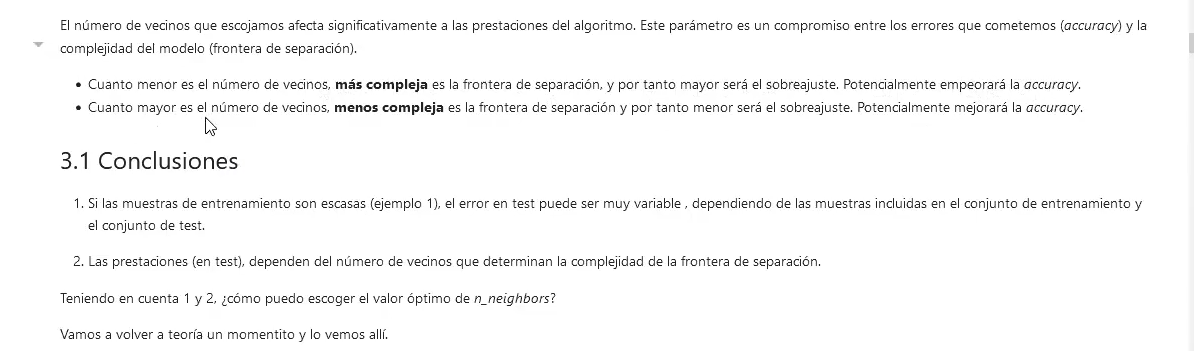
- ¿Qué es regularización? regularización es intentar simplificar un módelo que esta sobreajustado.
    - ¿Cuando tenemos un modelo sobreajustado? Cuando hemos ajustado casi exactamente a los valores de test. Por ejemplo, cuando usamos K-NN con un solo vecino, eso estaba completamente sobreajustado. Y la forma de hacer que no estuviera sobreajustado fue hacer el módelo un poco mas sencillo, en este caso aúmentar la cantidad de vecinos.
- En regresión lineal la forma de penalizar es regularizar es penalizar los valores de los párametros.
- **Regresion lineal por si sola no tiene un párametro de regularización**, pero si nos vamos Lasso es regresión lineal pero con regularización. Entonces, tenemos que hacer exactamente lo mismo que hacemos en regresión lineal pero como factor añadido, tenemos que controlar el nivel de regularización.
   - **¿Y esto cuando nos puede suceder?** cuando estamos haciendo regresión lineal y nos estan saliendo módelos muy complicados. **¿Que soluciones tenemos para eso?** podemos elegir las variables que queremos haciendo un analisis manual de todas las características o dejando que el modelo de Lasso lo haga por nosotros. O un módelo como Ridge que reduzca los valores de los parámetros Omegas.
- ¿Siempre debo usar Ride y Lasso? Se puede usar siempre Lasso pero tener en cuenta que es un poco costoso computacionalmente hablando.


# Preguntas a CHATGPT

## ¿Cuál es la funcion en sklearn que te dice cuales features son mas relevantes para un modelo a partir de un dataset?

En **scikit-learn** (sklearn), puedes utilizar varias técnicas para evaluar la relevancia de las características (features) de un conjunto de datos. Algunas de las funciones y métodos más comunes para esto son:

1. **`SelectFromModel`**: Este es un selector de características basado en un modelo que ya ha sido entrenado. Puedes usarlo con cualquier modelo que tenga un atributo `coef_` o `feature_importances_` (por ejemplo, árboles de decisión, regresión logística, etc.). El modelo selecciona las características más importantes basadas en estos valores.

   Ejemplo de uso con un modelo de regresión logística:
   ```python
   from sklearn.feature_selection import SelectFromModel
   from sklearn.linear_model import LogisticRegression
   
   # Suponiendo que tienes X_train y y_train
   model = LogisticRegression()
   model.fit(X_train, y_train)
   
   selector = SelectFromModel(model, threshold="mean")  # Selecciona las características más relevantes
   X_selected = selector.transform(X_train)
   ```

2. **`mutual_info_classif`** y **`mutual_info_regression`**: Estas funciones calculan la información mutua entre las características y el objetivo (target), que puede ser útil para determinar la relevancia de las características, especialmente en problemas no lineales.

   Ejemplo de uso para clasificación:
   ```python
   from sklearn.feature_selection import mutual_info_classif
   
   # Suponiendo que tienes X_train y y_train
   mi_scores = mutual_info_classif(X_train, y_train)
   print(mi_scores)
   ```

3. **`RandomForestClassifier` o `RandomForestRegressor`**: Los modelos de bosques aleatorios (Random Forest) tienen un atributo `feature_importances_` que indica la importancia de cada característica. Este método es muy popular para obtener una clasificación de las características más relevantes.

   Ejemplo de uso con RandomForest:
   ```python
   from sklearn.ensemble import RandomForestClassifier
   
   # Suponiendo que tienes X_train y y_train
   rf = RandomForestClassifier()
   rf.fit(X_train, y_train)
   
   # Importancia de las características
   print(rf.feature_importances_)
   ```

4. **`LinearRegression` o `LogisticRegression`**: Estos modelos también proporcionan un atributo `coef_` que indica la importancia de las características, especialmente en modelos lineales.

   Ejemplo de uso con regresión logística:
   ```python
   from sklearn.linear_model import LogisticRegression
   
   # Suponiendo que tienes X_train y y_train
   model = LogisticRegression()
   model.fit(X_train, y_train)
   
   # Coeficientes del modelo (importancia de las características)
   print(model.coef_)
   ```

#### Resumen
Las principales funciones para conocer la relevancia de las características en scikit-learn son:

- **`SelectFromModel`**: Selección de características basada en un modelo ya entrenado.
- **`mutual_info_classif` / `mutual_info_regression`**: Información mutua para clasificar o regresión.
- **`RandomForestClassifier/Regressor`**: Importancia de características basada en árboles aleatorios.
- **`LogisticRegression` o `LinearRegression`**: Coeficientes de un modelo lineal.

Cada una de estas funciones tiene sus ventajas dependiendo del tipo de modelo y del problema que estés resolviendo.

------

## ¿Y el de recorter_feature_elimination?

¡Claro! **`RFE` (Recursive Feature Elimination)** es otra técnica muy popular en **scikit-learn** para seleccionar las características más relevantes. 

**RFE** funciona de la siguiente manera:
1. Entrena un modelo con todas las características.
2. Elimina la característica menos importante (la que tenga el coeficiente más bajo o la menor importancia, según el tipo de modelo).
3. Vuelve a entrenar el modelo con las características restantes y repite este proceso hasta que solo quede el número deseado de características.

La función **`RFE`** se encuentra en el módulo `sklearn.feature_selection`, y puedes usarla con cualquier modelo que permita evaluar la importancia de las características (por ejemplo, modelos lineales o árboles de decisión).

#### Ejemplo de uso de `RFE`:

Supongamos que tienes un conjunto de datos de entrenamiento `X_train` y las etiquetas `y_train`, y deseas seleccionar las 5 características más importantes utilizando un modelo de regresión logística:

```python
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Suponiendo que tienes X_train y y_train
model = LogisticRegression()

# Aplicar RFE para seleccionar las 5 características más importantes
selector = RFE(model, n_features_to_select=5)
selector = selector.fit(X_train, y_train)

# Obtener las características seleccionadas
print("Características seleccionadas:", selector.support_)  # True si la característica es seleccionada
print("Ranking de características:", selector.ranking_)  # Menor es más importante
```

#### Explicación:
- **`model`**: El modelo que se usará para evaluar la importancia de las características.
- **`n_features_to_select`**: Especifica cuántas características deseas seleccionar. En este caso, seleccionamos 5 características.
- **`selector.support_`**: Devuelve un array de booleanos que indica si cada característica fue seleccionada (True) o no (False).
- **`selector.ranking_`**: Devuelve el ranking de las características, donde el número 1 indica la característica más importante.

#### ¿Cómo funciona `RFE`?
- `RFE` evalúa el rendimiento del modelo y elimina recursivamente las características menos relevantes, basándose en el rendimiento del modelo (por ejemplo, el coeficiente en un modelo lineal o la importancia en un árbol).
- El proceso continúa hasta que se alcanza el número deseado de características seleccionadas.

#### Ventajas:
- **RFE** es muy útil cuando se desea obtener un número reducido de características sin perder rendimiento.
- Es aplicable a cualquier modelo de **scikit-learn** que permita la evaluación de la importancia de las características.

#### Conclusión:
`RFE` es una excelente opción cuando se desea realizar una selección de características de manera sistemática, eliminando las menos relevantes a medida que el modelo avanza.

------

## ¿A parte de esas que otras opciones hay y cual recomiendas?

En **scikit-learn** hay varias técnicas adicionales para la selección de características, además de **RFE** y las que mencioné anteriormente. Cada método tiene sus ventajas según el tipo de datos, el modelo y los objetivos del análisis. Aquí te hago un resumen de otras opciones importantes para la selección de características, y te doy recomendaciones sobre cuál utilizar dependiendo del contexto.

### 1. **`SelectKBest`**
`SelectKBest` es un selector de características que utiliza una prueba estadística (por ejemplo, *chi-cuadrado*, correlación de Pearson, etc.) para evaluar la relevancia de cada característica.

#### Ejemplo con el test *chi-cuadrado*:
```python
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Cargar un dataset de ejemplo
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)

# Selección de las 10 características más importantes usando chi-cuadrado
selector = SelectKBest(chi2, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
```

**Ventajas**:
- Es simple de usar y rápido.
- Funciona bien con datos de tipo categórico o cuando hay una relación lineal clara entre las características y el objetivo.
  
**Limitación**:
- Depende de la prueba estadística que se elija, por lo que podría no funcionar bien si las relaciones no son lineales.

---

### 2. **`SelectPercentile`**
`SelectPercentile` selecciona las características más relevantes basadas en un porcentaje del total de características. Al igual que `SelectKBest`, se puede usar con diferentes tests estadísticos.

#### Ejemplo:
```python
from sklearn.feature_selection import SelectPercentile, chi2

# Selección del 20% de las mejores características
selector = SelectPercentile(chi2, percentile=20)
X_train_selected = selector.fit_transform(X_train, y_train)
```

**Ventajas**:
- Permite seleccionar un porcentaje específico de características, lo que puede ser útil cuando se tienen muchos atributos.

**Limitación**:
- Depende de la misma prueba estadística que `SelectKBest`, por lo que también podría no ser efectiva en relaciones no lineales.

---

### 3. **`VarianceThreshold`**
`VarianceThreshold` es una técnica de selección de características que elimina las características cuya varianza es menor que un umbral. Es útil cuando se quiere eliminar características constantes o casi constantes.

#### Ejemplo:
```python
from sklearn.feature_selection import VarianceThreshold

# Eliminar características cuya varianza es menor a 0.01
selector = VarianceThreshold(threshold=0.01)
X_train_selected = selector.fit_transform(X_train)
```

**Ventajas**:
- Es muy simple y útil cuando se sabe que algunas características tienen muy poca variabilidad y no aportan información.
  
**Limitación**:
- No toma en cuenta la relación de las características con la variable objetivo, solo se basa en la varianza.

---

### 4. **`f_classif` y `f_regression`**
Estos son tests de análisis de varianza (ANOVA) que se utilizan para seleccionar características relevantes para tareas de clasificación y regresión, respectivamente.

#### Ejemplo de `f_classif` (para clasificación):
```python
from sklearn.feature_selection import SelectKBest, f_classif

# Seleccionar las 5 mejores características usando ANOVA F-value
selector = SelectKBest(f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
```

**Ventajas**:
- Muy útil para problemas de clasificación, cuando se busca la relación entre las características y la variable objetivo.
- También funciona bien para problemas de regresión con `f_regression`.

**Limitación**:
- Asume que las características y el objetivo siguen una distribución normal.

---

### 5. **Métodos basados en modelos**:
Además de los modelos como `RandomForest` o `LogisticRegression`, hay otras técnicas que se pueden usar con diferentes tipos de modelos.

#### **L1 Regularization (Lasso)**
El **Lasso** (regresión L1) puede ayudar a seleccionar características al aplicar penalizaciones en los coeficientes del modelo. Las características cuyos coeficientes sean igual a cero pueden considerarse no relevantes.

```python
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Usar Lasso para seleccionar características
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# Selección de características usando el modelo Lasso
selector = SelectFromModel(lasso, threshold="mean")
X_train_selected = selector.transform(X_train)
```

**Ventajas**:
- Muy útil para problemas de regresión.
- Realiza la selección de características de forma automática, eliminando aquellas que tienen una contribución mínima.

---

### 6. **Tree-based Methods (e.g., `DecisionTreeClassifier`, `GradientBoosting`)**
Los modelos basados en árboles, como los árboles de decisión, **XGBoost**, o **Gradient Boosting**, proporcionan una estimación directa de la importancia de cada característica mediante el atributo `feature_importances_`.

```python
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Ver la importancia de las características
print(rf.feature_importances_)
```

**Ventajas**:
- Son muy efectivos en problemas complejos y no lineales.
- Proporcionan una evaluación directa de la importancia de las características.

**Limitación**:
- Los modelos pueden ser más complejos y requieren más tiempo de entrenamiento, especialmente en grandes conjuntos de datos.

---

#### Recomendaciones:

La elección de la técnica depende del tipo de datos y el problema que estés abordando:

- **Si tienes muchas características y deseas reducir el conjunto de manera sistemática**, **RFE** o **`SelectKBest`** con una prueba estadística (como ANOVA o *chi-cuadrado*) pueden ser útiles.
- **Si sospechas que hay características muy constantes o poco informativas**, prueba **`VarianceThreshold`**.
- **Si estás trabajando con un modelo complejo**, como árboles de decisión o modelos de ensamble (e.g., Random Forest, XGBoost), los **atributos de importancia de características** proporcionados por el modelo pueden ser muy efectivos.
- **Si estás resolviendo un problema de regresión**, el uso de **Lasso (L1 Regularization)** puede ayudar a reducir el número de características seleccionadas.

**Recomendación general**: Si no sabes a priori qué método es el mejor, una buena estrategia inicial es utilizar **RandomForest** o **XGBoost** para obtener una visión general de la importancia de las características y luego usar **RFE** o **Lasso** para ajustar y refinar la selección.

¡Todo depende del contexto y los objetivos del análisis!

------